# Cornerstone of ML Process:
'Understand your data and how it relates to the questions you're trying to answer.'

In [14]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Update to current version of sklearn
sklearn.__version__

'0.23.1'

# IRIS DATASET
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [16]:
# Use scikit-learns built in iris dataset to begin machine learning journey.

# kwarg `as_frame` newly added in version 0.23.1. If set to True, the loaded data will
# Be pandas data structures.
b_iris = load_iris(as_frame=True)

In [17]:
# The variable is a bunch object. It has different pieces of data contained within.
type(b_iris)

sklearn.utils.Bunch

In [18]:
# This is a list of all data attached to the Bunch object.

b_iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
# Read the docs to understand the data were working with.

# Number of records/rows/instances - 150
    # 50 records for each Iris
# Number of variables/columns/attributes - 4
#   Column headers:
#   2 Sepal measurements - centimeters
#   2 Petal measurements - centimeters
# Species of Iris - 3 types

# Interesting findings:
#   1/3 species of Iris is linearly seperable from the rest
#   2/3 species of Iris are NOT linearly seperable from each other - Derived data?

print(b_iris.DESCR, end='\n')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
# Accessing the data key, we see that the iris variables are stored as a dataframe thanks to our kwarg, `as_frame`=True. 

type(b_iris.data)

pandas.core.frame.DataFrame

In [21]:
# Taking a look at the shape of the `data` attribute, we are missing a column. Species target values.

b_iris.data.shape

(150, 4)

In [22]:
b_iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
type(b_iris.target)

pandas.core.series.Series

In [24]:
b_iris.target.shape

(150,)

In [25]:
b_iris.target[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [26]:
b_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
b_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
df_iris = pd.DataFrame(b_iris.data, columns=b_iris.feature_names)

In [71]:
df_iris["sepal area (cm^2)"] = df_iris.iloc[:,0] * df_iris.iloc[:,1]

In [72]:
df_iris['petal area (cm^2)'] =df_iris.iloc[:,2] * df_iris.iloc[:,3]

In [73]:
df_iris['target_names'] = b_iris.target_names[b_iris.target]

In [74]:
df_iris['target'] = b_iris.target

In [75]:
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal area (cm^2),petal area (cm^2),target_names,target
56,6.3,3.3,4.7,1.6,20.79,7.52,versicolor,1
136,6.3,3.4,5.6,2.4,21.42,13.44,virginica,2
115,6.4,3.2,5.3,2.3,20.48,12.19,virginica,2
101,5.8,2.7,5.1,1.9,15.66,9.69,virginica,2
55,5.7,2.8,4.5,1.3,15.96,5.85,versicolor,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:,:4], df_iris["target"], shuffle=True)

In [77]:
X_train.shape

(112, 4)

In [78]:
y_train.shape

(112,)

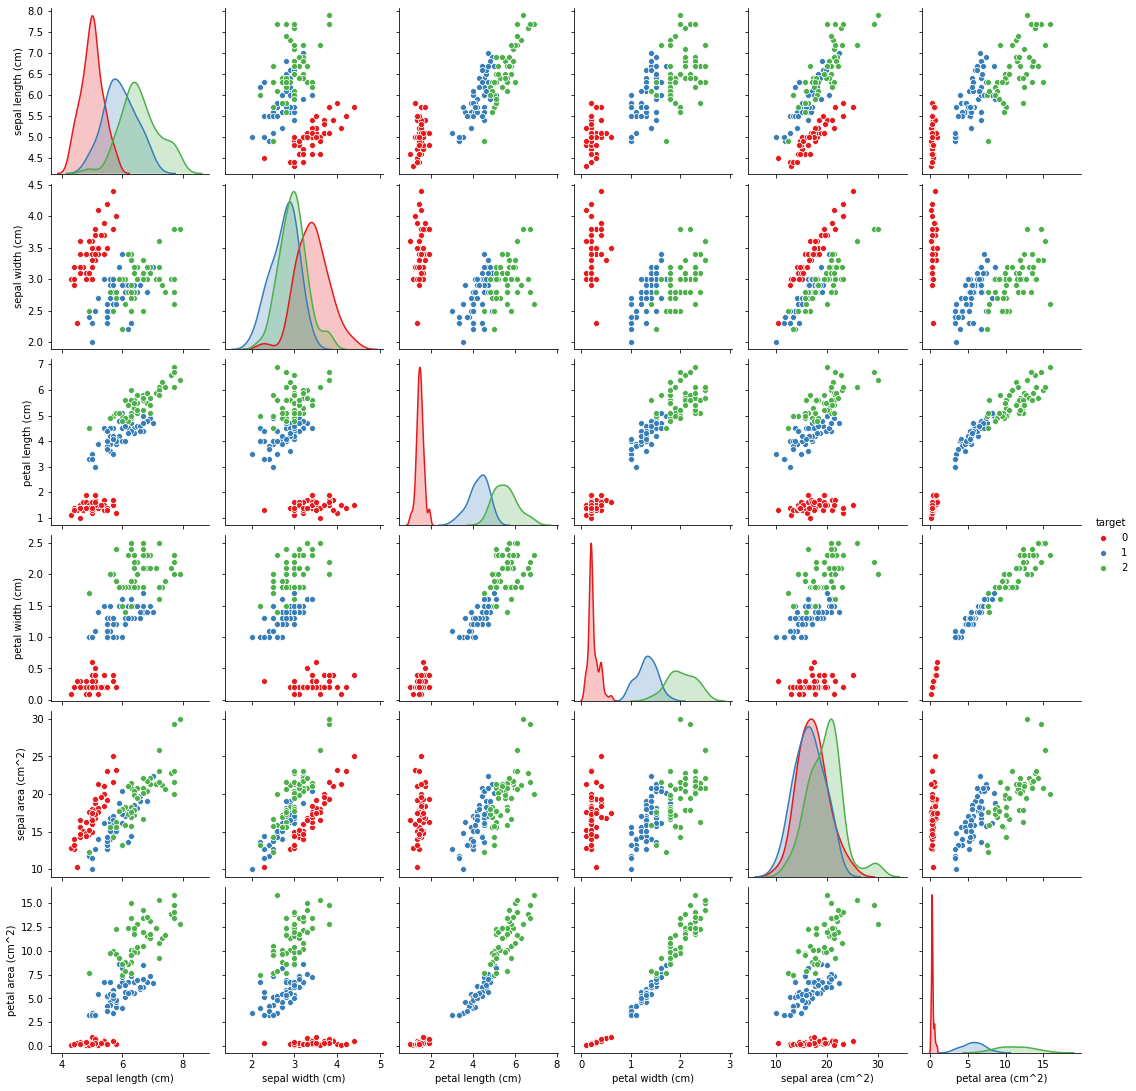

In [79]:
sns.pairplot(df_iris,
            vars=df_iris.columns[:6],
            hue=df_iris.columns[7],
            palette="Set1");

In [56]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
X_new = np.array([[3, 1.7, 2.1, 1.2]])

In [59]:
prediction = knn.predict(X_new)

In [60]:
print(b_iris.target_names[prediction])

['setosa']


In [61]:
knn.score(X_test, y_test)

0.9736842105263158